[View in Colaboratory](https://colab.research.google.com/github/ramkiranm/courses/blob/master/StyleTransferExample.ipynb)

This is a model that helps in neural style transfer. Following are the steps in neural style transfer
  
0. Load the VGG model
1.   Style to generated image cost. This is an average cost from different nodes on the network
2.   Content to generated image cost calculation based on VGG alorithm
3. Total cost = Content to generated image cost + Generated image to style cost
4.Total cost is minimized. Can use adam's optimizer for this. Learning rate to be given 



Step 1 : Load the VGG model and also any support libraries that are required for the entire program

In [0]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import decode_predictions
import pandas as pd
import numpy as np
vggModel = VGG16()
#print(vggModel.summary())
class CONFIG:
    IMAGE_WIDTH = 224
    IMAGE_HEIGHT = 224
    COLOR_CHANNELS = 3
    NOISE_RATIO = 0.6
    MEANS = np.array([123.68, 116.779, 103.939]).reshape((1,1,1,3)) 
    VGG_MODEL = 'pretrained-model/imagenet-vgg-verydeep-19.mat' # Pick the VGG 19-layer model by from the paper "Very Deep Convolutional Networks for Large-Scale Image Recognition".
    STYLE_IMAGE = 'images/stone_style.jpg' # Style image to use.
    CONTENT_IMAGE = 'images/content300.jpg' # Content image to use.
    OUTPUT_DIR = 'output/'

Step 2: Load a photo into google drive and make it available for the program. Also, convert the photo to size 224,224 as VGG model takes m,224,224,3 as the imput




In [0]:
def getDrivePhoto(file_id):
  from google.colab import auth
  auth.authenticate_user()

  from googleapiclient.discovery import build
  drive_service = build('drive', 'v3')

  import io
  from googleapiclient.http import MediaIoBaseDownload

  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    # _ is a placeholder for a progress object that we ignore.
    # (Our file is small, so we skip reporting progress.)
    _, done = downloader.next_chunk()

  downloaded.seek(0)
#print('Downloaded file contents are: {}'.format(downloaded.read()))

  from scipy.misc import imread, imresize
  from matplotlib.pyplot import imshow

  input_image = imread(downloaded)
  #imshow(input_image)
  print(input_image.shape)
  res = imresize(input_image,(224,224))
  print(res.shape)
  return res

Step 3: Preprocess the image as needed by VGG network. This also includes normalizing. Here normalization is only about substracting the config means

In [0]:
def preProcessImage(image):
  image = image.astype('float32')
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)
  image = image - CONFIG.MEANS
  return image

Step 4: Run the VGG16 model on the image so that it can predict the class that its in

In [0]:
def executeVGG(image):
  yhat = vggModel.predict(image)
  label = decode_predictions(yhat)
  label = label[0][0]
  return label[1]

Step 5: Interpret the model output so that the class can be found

(730, 1280, 3)
(224, 224, 3)


/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


40960/35363 [==================================] - 0s 3us/step
This is a content image alp


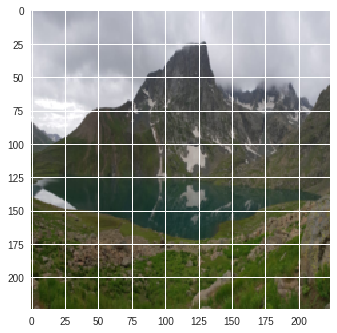

In [11]:
from matplotlib.pyplot import imshow
content_Image = getDrivePhoto('1N5QKLnoW56NIUzmFKB8V92xjAhVr5bZE')
imshow(content_Image)
processedContent = preProcessImage(content_Image)
print("This is a content image", executeVGG(processedContent))

Step 6: Get the style image into the progress

(745, 1068, 3)
(224, 224, 3)


/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


This is style image cliff


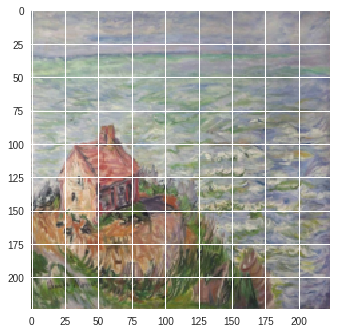

In [12]:
style_Image = getDrivePhoto('10ResUNMsCzutF8wec1-8Xyr7Hod_ZLxy')
imshow(style_Image)
processedStyle = preProcessImage(style_Image)
print("This is style image", executeVGG(processedStyle))

In [0]:
def reshape_and_normalize_image(image):
    """
    Reshape and normalize the input image (content or style)
    """
    
    # Reshape image to mach expected input of VGG16
    image = np.reshape(image, ((1,) + image.shape))
    
    # Substract the mean to match the expected input of VGG16
    image = image - CONFIG.MEANS
    
    return image

Step 7: Initialize generated image

In [0]:
def generate_noise_image(content_image, noise_ratio = CONFIG.NOISE_RATIO):
    """
    Generates a noisy image by adding random noise to the content_image
    """
    
    # Generate a random noise_image
    noise_image = np.random.uniform(-20, 20, (1, CONFIG.IMAGE_HEIGHT, CONFIG.IMAGE_WIDTH, CONFIG.COLOR_CHANNELS)).astype('float32')
    
    # Set the input_image to be a weighted average of the content_image and a noise_image
    input_image = noise_image * noise_ratio + content_image * (1 - noise_ratio)
    
    return input_image

In [0]:
generate_noise_image()